#**Cats-Dogs from kaggle Identification** 

In [ ]:
import tensorflow as tf
import os 
import zipfile


###**Kaggle pre-paration**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=b0fcf50fe392b20bba784489fbd9ee955e2270c96f32528b0c1e394b270b993a
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

## *Importing dataset from Kaggle*

In [ ]:
!kaggle competitions download -c dogs-vs-cats -p "/tmp"

 99% 802M/812M [00:05<00:00, 124MB/s]
100% 812M/812M [00:05<00:00, 153MB/s]


In [ ]:
!kaggle datasets download -d kushleshkumar/cats-and-dogs -p '/tmp'

 95% 190M/199M [00:01<00:00, 122MB/s]
100% 199M/199M [00:01<00:00, 121MB/s]


### Extract dataset

In [ ]:
local_zip='/tmp/dogs-vs-cats.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
local_zip='/tmp/train.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
local_zip='/tmp/cats-and-dogs.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
!mkdir "/tmp/train/cats"
!mkdir "/tmp/train/dogs"

In [ ]:
!mv "/tmp/train/"dog* "/tmp/train/dogs"

mv: cannot move '/tmp/train/dogs' to a subdirectory of itself, '/tmp/train/dogs/dogs'


In [ ]:
!mv "/tmp/train/"cat* "/tmp/train/cats"

mv: cannot move '/tmp/train/cats' to a subdirectory of itself, '/tmp/train/cats/cats'


In [ ]:
!ls -al "/tmp/train"

total 1496
drwxr-xr-x 4 root root 765952 Jul 13 11:45 .
drwxrwxrwt 1 root root   4096 Jul 13 11:40 ..
drwxr-xr-x 2 root root 389120 Jul 13 11:45 cats
drwxr-xr-x 2 root root 372736 Jul 13 11:43 dogs


## Making Train Set and Validation Set

In [ ]:
train_dir= "/tmp/train"
Val_dir="/tmp/KK cats_and_dogs_filtered/train"


# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(Val_dir, 'cats')
validation_dogs_dir = os.path.join(Val_dir, 'dogs')




######Testing names

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )
val_cat_fnames = os.listdir( validation_cats_dir )
val_dog_fnames = os.listdir( validation_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])
print('*'*50)
print(val_cat_fnames[:10])
print(val_dog_fnames[:10])

['cat.1569.jpg', 'cat.11185.jpg', 'cat.6318.jpg', 'cat.9141.jpg', 'cat.1288.jpg', 'cat.6845.jpg', 'cat.4557.jpg', 'cat.1736.jpg', 'cat.3824.jpg', 'cat.1542.jpg']
['dog.10802.jpg', 'dog.4566.jpg', 'dog.11131.jpg', 'dog.4166.jpg', 'dog.6034.jpg', 'dog.7496.jpg', 'dog.5726.jpg', 'dog.10715.jpg', 'dog.9408.jpg', 'dog.5714.jpg']
**************************************************
['Cat_258.jpg', 'Cat_036.jpg', 'Cat_153.jpg', 'Cat_135.jpg', 'Cat_173.jpg', 'Cat_039.jpg', 'Cat_093.jpg', 'Cat_069.jpg', 'Cat_168.jpg', 'Cat_107.jpg']
['Dog_122.jpg', 'Dog_240.jpg', 'Dog_165.jpeg', 'Dog_250.jpg', 'Dog_086.jpg', 'Dog_209.jpg', 'Dog_210.jpg', 'Dog_059.jpg', 'Dog_113.jpg', 'Dog_192.jpg']


###**Let's find out the total number of cat and dog images in the train and validation directories:**

In [ ]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 12500
total training dog images : 12500
total validation cat images : 250
total validation dog images : 250


#### **See**

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

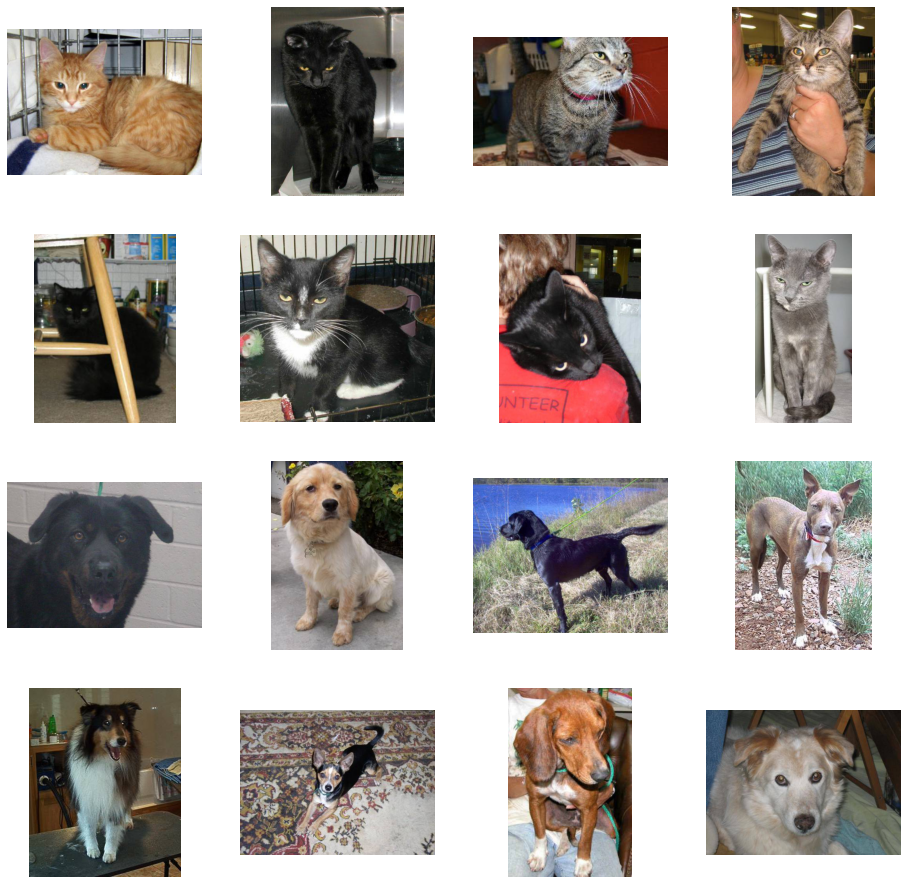

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


#*Now the game begins* 

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 32)        18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9248)             

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

##***Using Image Data Generator to train, Validation directory***

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(Val_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 25000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
history=model.fit(train_generator,steps_per_epoch=125,validation_data=validation_generator,validation_steps=25,epochs=50,verbose=2)

Epoch 1/50
125/125 - 26s - loss: 0.5863 - accuracy: 0.7004 - val_loss: 0.5936 - val_accuracy: 0.6740
Epoch 2/50
125/125 - 26s - loss: 0.5404 - accuracy: 0.7396 - val_loss: 0.6803 - val_accuracy: 0.6420
Epoch 3/50
125/125 - 26s - loss: 0.5282 - accuracy: 0.7380 - val_loss: 0.6351 - val_accuracy: 0.6900
Epoch 4/50
125/125 - 26s - loss: 0.5237 - accuracy: 0.7356 - val_loss: 0.5461 - val_accuracy: 0.7440
Epoch 5/50
125/125 - 27s - loss: 0.5062 - accuracy: 0.7544 - val_loss: 1.1019 - val_accuracy: 0.6000
Epoch 6/50
125/125 - 26s - loss: 0.5132 - accuracy: 0.7652 - val_loss: 0.6296 - val_accuracy: 0.6960
Epoch 7/50
125/125 - 26s - loss: 0.5003 - accuracy: 0.7572 - val_loss: 0.6525 - val_accuracy: 0.7240
Epoch 8/50
125/125 - 26s - loss: 0.4749 - accuracy: 0.7736 - val_loss: 0.6526 - val_accuracy: 0.6960
Epoch 9/50
125/125 - 25s - loss: 0.4697 - accuracy: 0.7760 - val_loss: 0.5785 - val_accuracy: 0.7520
Epoch 10/50
125/125 - 26s - loss: 0.4774 - accuracy: 0.7748 - val_loss: 0.5390 - val_accura

##**As you can see, its overfitting near to 40 epochs**

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

Saving images (6).jfif to images (6).jfif
[1.]
images (6).jfif is a dog
